In [1]:
import psycopg2
import pandas as pd
import sqlalchemy
import matplotlib as plt

%matplotlib inline

In [2]:
from sqlalchemy import create_engine
# Postgres username, password, and database name
POSTGRES_ADDRESS = 'motty.db.elephantsql.com' ## INSERT YOUR DB ADDRESS IF IT'S NOT ON PANOPLY
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'cakenxca' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES USERNAME
POSTGRES_PASSWORD = 'fDqDMOO_vMTtj_B9tIjlDtIdKfPjxtlK' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES PASSWORD 
POSTGRES_DBNAME = 'cakenxca' ## CHANGE THIS TO YOUR DATABASE NAME
# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
     .format(username=POSTGRES_USERNAME,
       password=POSTGRES_PASSWORD,
       ipaddress=POSTGRES_ADDRESS,
       port=POSTGRES_PORT,
       dbname=POSTGRES_DBNAME))
# Create the connection
cnx = create_engine(postgres_str)

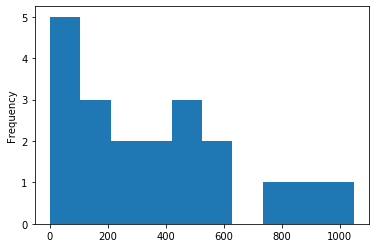

In [3]:
#Gráfico histograma do saldo das pessoas
pessoas = pd.read_sql_query('''SELECT * FROM pessoa''', cnx)
pessoas.saldo.plot.hist()

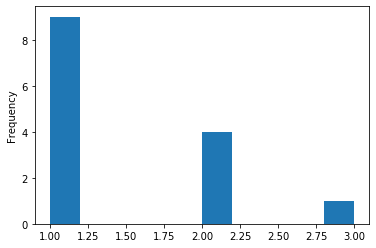

In [4]:
#Gráfico histograma da quantidade de doações das pessoas
doacoes = pd.read_sql_query('''SELECT pessoa.id_pessoa, count(pessoa.id_pessoa) as quant_doacoes FROM pessoa inner join item_doacao
on(pessoa.id_pessoa = item_doacao.fk_pessoa_id_pessoa) group by pessoa.id_pessoa''', cnx)
doacoes.quant_doacoes.plot.hist()

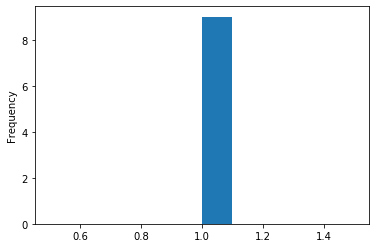

In [5]:
#Gráfico histrograma da quantidade de necessidades das pessoas
quant_necessidades = pd.read_sql_query('''SELECT count(pessoa.id_pessoa)as quant_necessidades FROM PESSOA
INNER JOIN EXPOE_PESSOA_NECESSIDADE_ONG ON (PESSOA.ID_PESSOA = EXPOE_PESSOA_NECESSIDADE_ONG.FK_PESSOA_ID_PESSOA)
INNER JOIN NECESSIDADE ON(EXPOE_PESSOA_NECESSIDADE_ONG.FK_NECESSIDADE_ID_NECESSIDADE = NECESSIDADE.ID_NECESSIDADE) group by pessoa.id_pessoa''', cnx)
quant_necessidades.quant_necessidades.plot.hist()

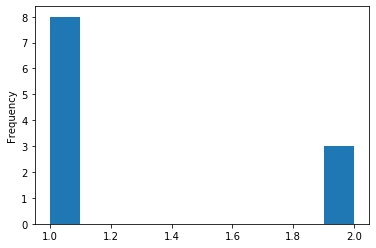

In [6]:
#Gráfico histograma da quantidade de solicitações de doações
quant_necessidades = pd.read_sql_query('''SELECT count(ong.id_ong)as quant_necessidades FROM ONG
INNER JOIN EXPOE_PESSOA_NECESSIDADE_ONG ON (ONG.ID_ONG = EXPOE_PESSOA_NECESSIDADE_ONG.FK_ONG_ID_ONG)
INNER JOIN NECESSIDADE ON(EXPOE_PESSOA_NECESSIDADE_ONG.FK_NECESSIDADE_ID_NECESSIDADE = NECESSIDADE.ID_NECESSIDADE) group by ong.id_ong''', cnx)
quant_necessidades.quant_necessidades.plot.hist()

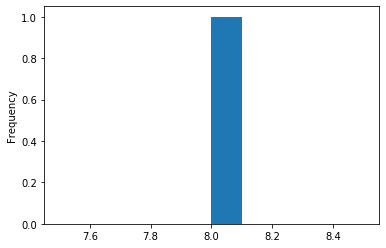

In [7]:
#Gráfico histograma da quantidade de requisições de ajuda
requisicoes = pd.read_sql_query('''SELECT count(pessoa.id_pessoa)as quant_requisicoes FROM PESSOA
INNER JOIN REQUISITA_DOACAO_REQUISITA ON (PESSOA.ID_PESSOA = REQUISITA_DOACAO_REQUISITA.FK_PESSOA_ID_PESSOA)''', cnx)
requisicoes.quant_requisicoes.plot.hist()

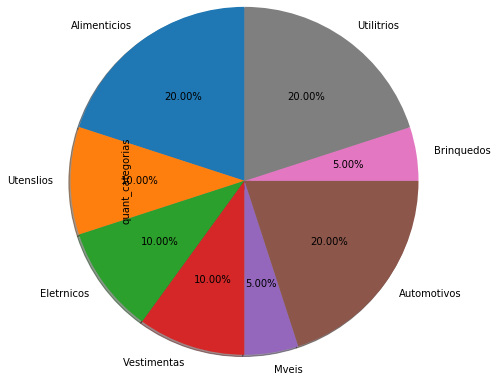

In [8]:
#Gráfico de porcentagem de categoria das doações
categorias = pd.read_sql_query('''SELECT categoria.nome, count(categoria.id_categoria) as quant_categorias FROM categoria inner join item_doacao
on(item_doacao.fk_categoria_id_categoria = categoria.id_categoria) group by categoria.id_categoria''', cnx)
dados_nomes = pd.read_sql_query('''SELECT categoria.nome from categoria order by id_categoria''', cnx)
nomes = dados_nomes.values.tolist()
nomes_formal =[]
for i in range(len(nomes)):
    nomes_formal.append(nomes[i][0])
categorias.quant_categorias.plot.pie(x='',labels=nomes_formal,autopct='%1.2f%%',shadow=True,startangle=90, radius=2)

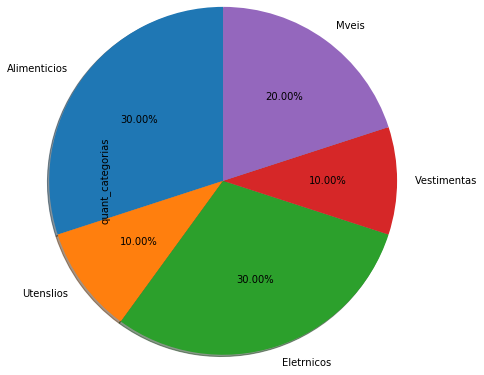

In [9]:
#Gráfico de porcentagem de categoria das doações
categorias_nec = pd.read_sql_query('''SELECT categoria_necessidade.nome, count(categoria_necessidade.id_categoria) as quant_categorias FROM categoria_necessidade inner join necessidade
on(necessidade.fk_categoria_necessidade_id_categoria = categoria_necessidade.id_categoria) group by categoria_necessidade.id_categoria''', cnx)
dados_nomes = pd.read_sql_query('''SELECT categoria_necessidade.nome from categoria_necessidade order by id_categoria''', cnx)
nomes = dados_nomes.values.tolist()
nomes_formal =[]
for i in range(len(nomes)):
    nomes_formal.append(nomes[i][0])
categorias_nec.quant_categorias.plot.pie(x='',labels=nomes_formal,autopct='%1.2f%%',shadow=True,startangle=90, radius=2)

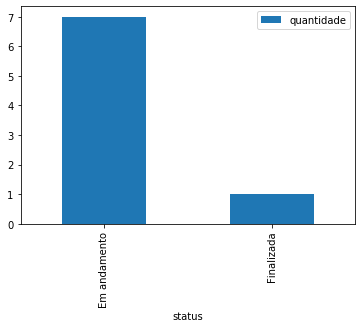

In [10]:
#Gráfico status das requisições
status_requisicoes = pd.read_sql_query('''SELECT status_requisicao.nome as status, count(status_requisicao.id_status) as quantidade FROM REQUISITA_DOACAO_REQUISITA
INNER JOIN STATUS_REQUISICAO ON (REQUISITA_DOACAO_REQUISITA.FK_STATUS_REQUISICAO_ID_STATUS = STATUS_REQUISICAO.ID_STATUS) GROUP BY STATUS_REQUISICAO.ID_STATUS''', cnx)
status_requisicoes.plot.bar(x='status', y='quantidade')

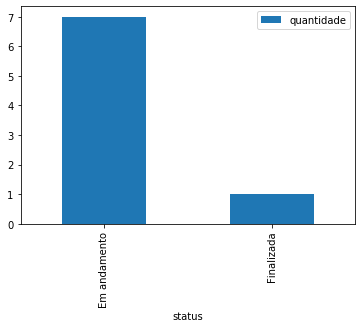

In [11]:
#Gráfico status das requisições
status_req_ajudas = pd.read_sql_query('''SELECT status_req_necessidade.nome as status, count(status_req_necessidade.id_mensagem_status) as quantidade FROM REQUISICAO_AJUDA_SUPRE_PESSOA_ONG_NECESSIDADE
INNER JOIN STATUS_REQ_NECESSIDADE ON (REQUISICAO_AJUDA_SUPRE_PESSOA_ONG_NECESSIDADE.FK_STATUS_REQ_NECESSIDADE_ID_MENSAGEM_STATUS = STATUS_REQ_NECESSIDADE.ID_MENSAGEM_STATUS) GROUP BY STATUS_REQ_NECESSIDADE.ID_MENSAGEM_STATUS''', cnx)
status_req_ajudas.plot.bar(x='status', y='quantidade')